**NPL Midterm Coursework by Donato Scarano**

Index

I. Introduction
- Problem area
- Objectives
- Dataset
- Evaluation methodology

II. Implementation
- Pre-processing
- Baseline
- Classification methodology
- Programming style

III. Outcome
- Performance
- Summary


**I. Introduction**



**1. Domain-specific area**

*The first step of the coursework is to identify and describe the problem or challenge. This is an area of industry or science where text classification methods can contribute.*

Text classification today are everywhere and can be used to organize, structure and categorize any kind of text.

Text classification is one of the foundations of natural language processing and can be used in a larger context with applications such as sentiment analysis, topic labelling, spam detection and intent detection.

Businesses are looking today to ways to interpret the huge amount of data generated everyday, manual analysis and classification is slow and inprecise, text classification is scalable to any business need allowing real-time analysis of vast amount of data in a consistent and accurate way.

The dataset I am considering for this coursework is the 20 Newsgroup dataset which contains a wide variety of texts and categories and which represent a good arena to work on classification of data.

20 Newsgroup dataset is a collection of approximately 20000 documents divided in different categories, the dataset is available in the scikit-learn library.


**2. Objectives**


The objective of the project is to employ a wide variety of techniques (Naive Bayes, Logistic Regression and more) to classify text and analyze term and documents frequency. 

There are many contributions this analys can provide to a business for example Netflix or Amazon use classification and sentiment analysis to refine their algorithms and to suggest the most relevant products, fraud detection or spam detection are other important business applications.

**3. Dataset**

The dataset I am considering for this coursework is the 20 Newsgroup dataset which contains a wide variety of texts and categories and which represent a good arena to work on classification of data.

20 Newsgroup dataset is a collection of approximately 20000 documents divided in different categories, the dataset is available in the scikit-learn library.




**4. Evaluation methodology**


Accuracy is the benchnmark I have chosen for the comparison between models but my initial exploratory analysis is aiming to confirm this. 

Other metrics I am considering are precision, recall, f-measure, and averages.

In some cases, for example with an unbalanced data set, accuracy is not a good metric and my analysis is aiming to confirm my initial assumptions.



**II. Implementation**

**5. Preprocessing**


In [4]:
#import libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import pandas as pd
import random




TRAIN DATASET

In [5]:
#import the data set
from sklearn.datasets import fetch_20newsgroups
#create a subset for the training data and remove header/footers/quotes as they add noise and have no value for the analysis
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [6]:
print('Training Dataset:', len(mydata_train['data']))

Training Dataset: 11314


In [7]:
# show all categories
mydata_train.target_names 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
#frequency for each category
targets, frequency = np.unique(mydata_train.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [9]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


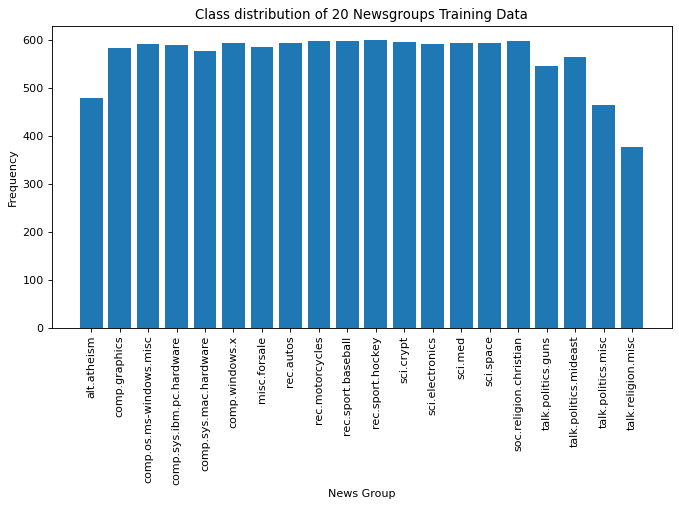

In [10]:
# Training dataset distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

We can see that most of the categories have an equal amount of frequency.
The dataset is balanced and it confirms that accuracy is a good metric for our analysis and that no resampling is needed.


TEST DATASET

In [11]:
#create a subset for the test data and remove header/footers/quotes as they add noise and have no value for the analysis
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [12]:
print('Testing dataset:', len(mydata_test['data']))


Testing dataset: 7532


In [13]:
#frequency for each category
targets_test, frequency_test = np.unique(mydata_test.target, return_counts=True)
targets_test_str = np.array(mydata_test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


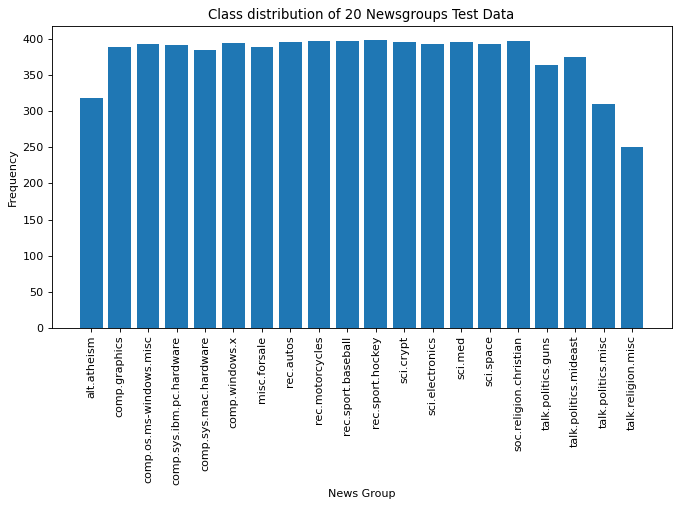

In [14]:
# Testing dataset distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

PRE-PROCESSING

We start processing both the train and tast dataset to clean them up.

In [15]:
#prepare train dataset
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [16]:
#remove numbers, capital letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [17]:
#prepare test dataset
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [18]:
#remove numbers, capital letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


VECTORIZATION

Ve want to vectorize the data based on word count.

In [19]:
#extract features from text files
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')

X_train_cv = count_vect.fit_transform(mydata_train_df.data)
X_test_cv = count_vect.transform(mydata_test_df.data)

#print the resulting shape of the sparse matrixes
print(X_train_cv.shape)
print(type(X_train_cv))

#commented out to avoid memory issues on my laptop during execution
#print(X_test_cv.shape)
#print(type(X_test_cv))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [20]:
#sparse matrix converted to dataframe
X_train_cv_df = pd.DataFrame(X_train_cv.todense())
X_train_cv_df.columns = sorted(count_vect.vocabulary_)
X_train_cv_df.head()

#X_test_cv_df = pd.DataFrame(X_test_cv.todense())
#X_test_cv_df.columns = sorted(count_vect.vocabulary_)
#X_test_cv_df.head()


,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaah,aaahh,aaahhhh,aaai,aacc,aachen,...,zznkjz,zznkzz,zznp,zzrk,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF VECTORIZATION

We use TF-IDF to extract "bag of words" from the text and apply TF-IDF (Term Frequency-Inverse Document Frequency) to weight the word counts by a measure of how often they appear in the document.

In [21]:
#create a document-term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(stop_words='english') 


X_train_tfidfV = tfidfV.fit_transform(mydata_train_df.data)
X_test_tfidfV = tfidfV.transform(mydata_test_df.data)

# print the resulting shape of the sparse matrix
print(X_train_tfidfV.shape)
print(type(X_train_tfidfV))

#print(X_test_cv.shape)
#print(type(X_test_cv))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [23]:
#sparse matrix converted to dataframe
X_train_tfidfV_df = pd.DataFrame(X_train_tfidfV.todense())
X_train_tfidfV_df.columns = sorted(tfidfV.vocabulary_)
X_train_tfidfV_df.head(5)

#X_test_cv_df = pd.DataFrame(X_test_cv.todense())
#X_test_cv_df.columns = sorted(count_vect.vocabulary_)
#X_test_cv_df.head()

,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaah,aaahh,aaahhhh,aaai,aacc,aachen,...,zznkjz,zznkzz,zznp,zzrk,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**6. Baseline performance**

I have chosen Multinomial Naive Bayes where the features are assumed to be generated from a simple multinomial distribution.

It describes the probability of observing counts among a number of categories.

Multinomial Naive Bayes is often used in text classification where the features are related to word counts or frequencies within a document to be classified.

**7. Classification approach**

I am planning to experiment with different classifiers (Multinomial Naive Bayes, Logistic Regression, Stochastic Gradient Descent and K Nearest Neighbors) and understand if stemming improve the accuracy and quality of results.

CLASSIFICATION WITHOUT STEMMING USING NAIVE BAYES

In [24]:
%%time
#Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB() 

# Train the model 
y_train = mydata_train_df.target
mnb.fit(X_train_cv, y_train) 

Wall time: 181 ms


MultinomialNB()

In [25]:
#model that was trained on the X_train_cv dataset is applied to the X_test_cv dataset
y_pred_cv_mnb = mnb.predict(X_test_cv) 
y_pred_cv_mnb

array([ 7,  1, 15, ..., 15,  3, 15])

In [26]:
#print metrics report and accuracy score 
from sklearn.metrics import classification_report, accuracy_score

y_test = mydata_test_df.target
print(accuracy_score(y_test, y_pred_cv_mnb))
print(classification_report(y_test, y_pred_cv_mnb))

0.6399362719065321
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       319
           1       0.57      0.70      0.63       389
           2       0.67      0.01      0.02       394
           3       0.50      0.71      0.58       392
           4       0.72      0.58      0.64       385
           5       0.58      0.80      0.67       395
           6       0.85      0.66      0.75       390
           7       0.82      0.70      0.76       396
           8       0.90      0.65      0.75       398
           9       0.93      0.76      0.84       397
          10       0.58      0.92      0.71       399
          11       0.58      0.78      0.66       396
          12       0.67      0.49      0.57       393
          13       0.83      0.79      0.81       396
          14       0.76      0.75      0.76       394
          15       0.48      0.90      0.63       398
          16       0.55      0.65      0.60       364
        

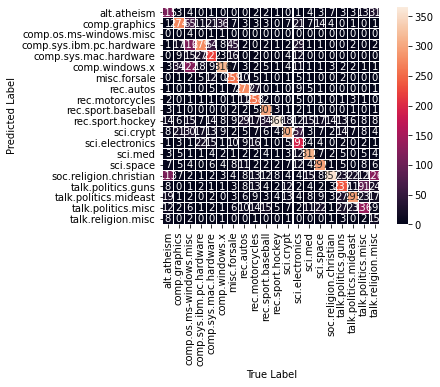

In [27]:
#use Seaborn Library to visualize the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_cv_mnb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,linewidths=.1,
xticklabels=mydata_train.target_names, yticklabels=mydata_test.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

CLASSIFICATION WITH STEMMING AND PIPELINE

Both stemming and lemmatization are text normalizing procedures

Stemming is the process of reducing inflection toward their root forms for example play is the root base word for "playing", "played" etc.
Stemming slice "playing" removing the suffix "-ing"

Lemmatization is the process of switching any word to its base root
It is similar to stemming but has a linguistically principled analysis and therefore identify the correct lemma of each word.
For example "troubled" is solved by lemmatization with "trouble" identifying the correct form
Stemming would have solved "troubled" by slicing "-ed" with a base root "troubl"

Stemming is faster but less accurate chopping words without context can create non existing words it can be useful though in a context where the meaning of the word is not important such as Spam Detection.

Lemmatization is slower but more accurate and give meaningful words it is used in contexts such as Queries and Answers where the meaning of the word is important.

We use here Snowball stemmer. 

In [28]:
#create a Stemmer class to feed it to the pipeline
stemmer = SnowballStemmer('english', ignore_stopwords=True)

class StemmedTfidfVectorizer(TfidfVectorizer):
    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

CLASSIFICATION WITH STEMMING USING NAIVE BAYES

In [29]:
%%time
#Naive Bayes model with stemming
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)),
        ('clf', MultinomialNB())])  

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.6648964418481147
              precision    recall  f1-score   support

           0       0.83      0.15      0.25       319
           1       0.69      0.65      0.67       389
           2       0.68      0.52      0.59       394
           3       0.56      0.74      0.64       392
           4       0.80      0.67      0.73       385
           5       0.77      0.81      0.79       395
           6       0.81      0.68      0.74       390
           7       0.85      0.73      0.79       396
           8       0.86      0.72      0.78       398
           9       0.96      0.77      0.86       397
          10       0.58      0.93      0.71       399
          11       0.53      0.81      0.64       396
          12       0.70      0.51      0.59       393
          13       0.85      0.75      0.80       396
          14       0.79      0.75      0.77       394
          15       0.35      0.92      0.51       398
          16       0.55      0.70      0.61       364
        

We can see an increase in accuracy compared to the model without stemming.

CLASSIFICATION WITH STEMMING USING LOGISTIC REGRESSION

In [30]:
%%time
#Logistic Regression with stemming
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), 
        ('clf', LogisticRegression())])  

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.6901221455124801
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       319
           1       0.63      0.70      0.66       389
           2       0.66      0.62      0.64       394
           3       0.68      0.65      0.67       392
           4       0.74      0.69      0.71       385
           5       0.82      0.70      0.75       395
           6       0.73      0.78      0.76       390
           7       0.78      0.72      0.75       396
           8       0.49      0.79      0.60       398
           9       0.79      0.83      0.81       397
          10       0.91      0.88      0.89       399
          11       0.89      0.68      0.77       396
          12       0.56      0.61      0.58       393
          13       0.77      0.79      0.78       396
          14       0.74      0.73      0.74       394
          15       0.65      0.80      0.72       398
          16       0.58      0.68      0.63       364
        

CLASSIFICATION WITH STEMMING USING STOCHASTIC GRADIENT DESCENT 

In [31]:
%%time
#Stochastic Gradient Descent with stemming
random.seed(1)
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), 
        ('clf', SGDClassifier())])  

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.6996813595326606
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       319
           1       0.66      0.71      0.68       389
           2       0.62      0.62      0.62       394
           3       0.69      0.64      0.66       392
           4       0.71      0.72      0.72       385
           5       0.80      0.72      0.76       395
           6       0.73      0.79      0.76       390
           7       0.77      0.72      0.75       396
           8       0.82      0.76      0.79       398
           9       0.55      0.87      0.68       397
          10       0.87      0.91      0.89       399
          11       0.85      0.72      0.78       396
          12       0.63      0.55      0.59       393
          13       0.79      0.80      0.79       396
          14       0.74      0.76      0.75       394
          15       0.65      0.82      0.73       398
          16       0.58      0.68      0.62       364
        

CLASSIFICATION WITH STEMMING USING K NEAREST NEIGHBORS

In [32]:
%%time
#kNN with stemming
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), 
        ('clf', KNeighborsClassifier(n_neighbors=5, weights='distance'))])

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.08404142326075412
              precision    recall  f1-score   support

           0       0.05      0.17      0.07       319
           1       0.06      0.14      0.08       389
           2       0.06      0.19      0.09       394
           3       0.10      0.11      0.11       392
           4       0.06      0.11      0.08       385
           5       0.24      0.04      0.07       395
           6       0.22      0.14      0.17       390
           7       0.05      0.10      0.07       396
           8       0.13      0.08      0.10       398
           9       0.06      0.07      0.06       397
          10       0.24      0.11      0.15       399
          11       0.12      0.06      0.08       396
          12       0.14      0.05      0.07       393
          13       0.11      0.04      0.05       396
          14       0.17      0.06      0.09       394
          15       0.12      0.01      0.02       398
          16       0.07      0.02      0.03       364
       

**8. Coding style**

I have used standard coding best practices with consistent notes accompanying the code at each step.

III Conclusions

**9. Evaluation**

I have compared classifiers and run some experiments with or without stemmming. We have noticed that TF-IDF Vectorization give better results than Count Vectorizer. 
The best accuracy was obtained using Stemming with SGD (Stochastic Gradient Descent).





**10. Summary and conclusions**

I have tested different classifiers and techniques as per the course material and experimented with different settings and configuration to understand better the dataset and obtain further insights.
The best perfermoning classifiers are Stochastic Gradient Descent and Logistic Regression.
Further experimentation could involve using stemming with bigrams or n-grams although it could be resource intensive for my basic laptop and would require a more accessorized laptop to avoid lenghty processing times.

